<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/TensorFlow_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction & Data Setup

**Regression** is a supervised machine learning technique which is used to predict continuous values. The ultimate goal of the regression algorithm is to plot a best-fit line or a curve between the input features (independant variables) and the output label (dependant variable).

In [ ]:
import tensorflow as tf

tf.__version__

'2.17.0'

For starters, we'll solve a very basic regression problem

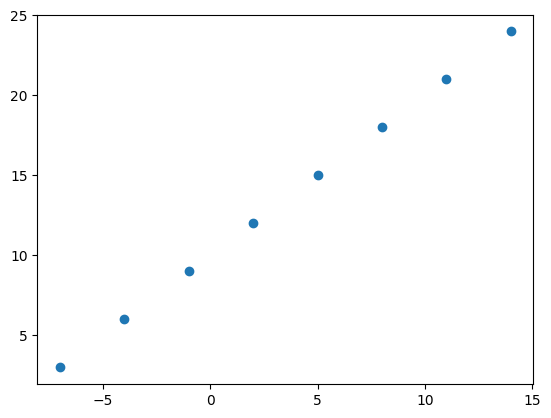

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a basic dataset with 1 feature X, and 1 label y
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y);

We created a basic dataset consisting of a single feature X and a single label y, where the relationship between X and y is linear $y = mx + b$, and $y = X + 10$.

Next, we will use tensorflow to build a model that will try and learn this relationship, and use this knowledge to correctly predict on new data.

Important thing to remember is that the relationship between features and labels is unknown in real applications. Here, we just generated some data for tutorial purposes.

In [ ]:
# Shape of data
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
# Shape of a single data point
# It is empty because it is a scalar
# I.e. the model will have input of size 1 and output of size 1
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

In [ ]:
# Turning numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Creating a Basic TensorFlow Regression Model

In order to build a TensorFlow model we need to:


1.   **Create a model** - defining the inputs, outputs and the hidden layers of the model.
2.   **Compile the model** - defining the loss function, optimizer, and optionally the evaluation metrics.
3. **Fit the model** - In other words, train the model on the train data in order to find the relationship between X and y.

First, we'll create a very basic model that consists of a single dense layer with one neuron.


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fitting the model
# Epochs define how many passes the model goes over the data
# We need to expand X because we can't fit on input data with ndim = 1, needs to be 2
# So we add an extra dimension to the input as per the documentation
model.fit(tf.expand_dims(X, axis=-1),
          y,
          epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 840ms/step - loss: 9.7892 - mae: 9.7892
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 9.6567 - mae: 9.6567
Epoch 3/5
1/1 [==============================] - 0s 28ms/step - loss: 9.5242 - mae: 9.5242
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 9.3917 - mae: 9.3917
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 9.2592 - mae: 9.2592


In [ ]:
# Making a prediction with our model
model.predict([17.0])

1/1 [==============================] - 0s 186ms/step


array([[21.048954]], dtype=float32)

As evident by the mean absolute error (MAE), model's prediction will be quite off the correct value, which is understandable since our model is very basic.

# Imporving the Model

Models can be imporved in various ways:


1.   Changing the architecture of the model by adding more layers, increasing the number of neurons in the hidden layers, or changing the activation functions.
2.   Changing the optimizer and / or the hyperparameters associated with it.
3. Fitting the model for longer (more epochs) to give the data more opportunities to learn patterns or representations in the data.



In [ ]:
# First let's just try to train the model for longer by increasing epochs from 5 to 100
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 606ms/step - loss: 10.4088 - mae: 10.4088
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 10.2763 - mae: 10.2763
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1438 - mae: 10.1438
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 10.0113 - mae: 10.0113
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 9.8788 - mae: 9.8788
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 9.7463 - mae: 9.7463
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 9.6138 - mae: 9.6138
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 9.4813 - mae: 9.4813
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 9.3488 - mae: 9.3488
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2163 - mae: 9.2163
Epoch 11/100
1/1 [==============================] - 0s 20ms/

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 123ms/step


array([[30.104225]], dtype=float32)

As we can see, after training for 100 epochs, the model was close to predicting the correct value.

In [ ]:
# Adding an additional hidden layer with 100 neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.1660 - mae: 14.1660
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 13.6110 - mae: 13.6110
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.0931 - mae: 13.0931
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5750 - mae: 12.5750
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12.0497 - mae: 12.0497
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 11.5232 - mae: 11.5232
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 10.9862 - mae: 10.9862
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 10.4327 - mae: 10.4327
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 9.8550 - mae: 9.8550
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 9.3031 - mae: 9.3031
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# We got worse predictions
model.predict([17.0])

1/1 [==============================] - 0s 299ms/step


array([[31.813593]], dtype=float32)

In [ ]:
# Using the Adam optimizer with a learning rate of 0.01 instead of SGD
# And removing the ReLU activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              )

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.1957
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 13.0998
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 13.0040
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 12.9083
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8125
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.7167
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6209
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5251
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4292
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3333
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2374
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 12.1413
Epoch 13/100
1/1 [=====================

In [ ]:
# We got worse loss value, but the prediction was slightly better
model.predict([17.0])

1/1 [==============================] - 0s 218ms/step


array([[30.488384]], dtype=float32)

Generally, not all the steps of improving the model will actually improve it.

We changed the architecture of the model by adding an additional hidden layer with 100 nerurons and a ReLU activation function, and after training we did get a lower MAE. But it is important to understand that this is the **training** loss which is not indicative of how good our model is.

This can be seen when making a prediction using the imporved model. This prediction was worse than the one made with simpler model, which means that the model is overfitting the data.

Model improvement must be done iteratively by adding slight improvements to the model, and changing few hyperparameters at a time.

#Evaluating the Model

Evaluating a model is an important step of determining how good our model is.

The best way to evaluate a model is by:


1.   Plotting the original data;
2.   Visualizing the architecture of the model;
3.   Visualizing the loss and accuracy curves (among others);
4.   Making predictions and comparing them to the ground truth values (as we've already briefly done);  



In [ ]:
# To evaluate the model we'll first create a larger dataset for better visualization
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

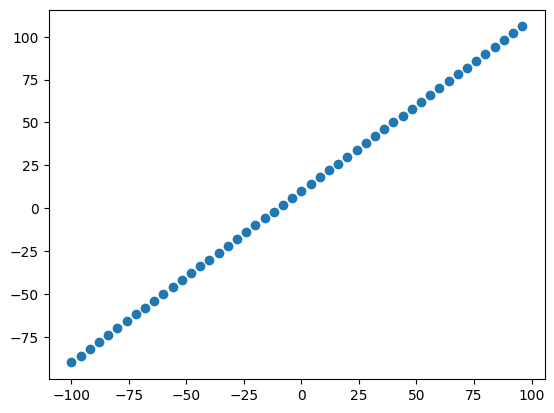

In [ ]:
# Plotting the original data
plt.scatter(X, y)

An important part of fitting a model is preforming **cross-validation**, in other words, splitting the data. The model will train on part of the data (around 70% - 80%), and validate on what remains of the data (typically 20% - 30%).

There are different ways of performing cross-validation, like the validation set method, or k-fold cross-validation, and the train-test split is the simplest of them.

**The train-test split** - is a model validation process that allows you to simulate how your model would perform with new data.



In [ ]:
# Creating a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), # splitting can't be done on tensors so we temporarily transform the data into numpy arrays
                                                    np.array(y),
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# 80% train, 20% test
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Turning the sets back into tensors
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

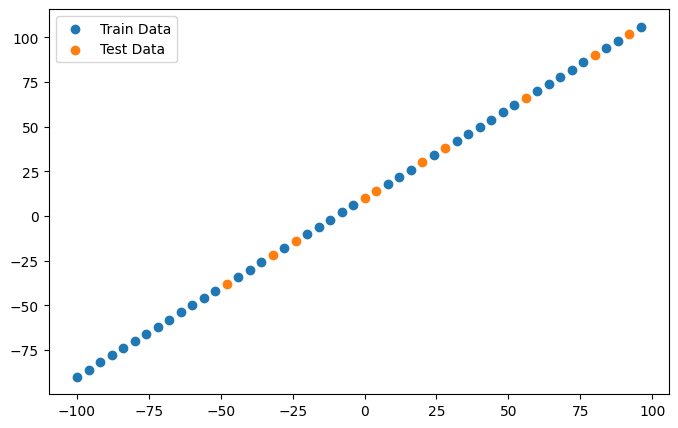

In [ ]:
# Visualizing the splits
plt.figure(figsize = (8,5))
plt.scatter(X_train, y_train, label = 'Train Data')
plt.scatter(X_test, y_test, label = 'Test Data')
plt.legend();

Now that we have our data ready and split, we will create a model that will be fitted on the train data, and evaluated on the test data.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1,
                          input_shape = [1]) # We need to define the input shape if we want to visualize the model before fitting it
])

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Getting a summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Total params** - is the number of parameters in the model. We only have 2, since there's 1 weight connecting the input to the single neuron of the hidden layer, and 1 weight that connects said neuron to the output.

**Trainable params** - is the total number of parameters that can be trained in the network. Here both of the weights are trainable. This number can be different from the total params when using transfer learning.

In each layer, the output (activation) of each neuron equals the sum of products of each connected neuron from the previous layer and the **weight** of said connection + the **bias**.

$a_j=\sum_{i=1}^D w_{j i}^{(1)} x_i+w_{j 0}^{(1)}$

Each of these activations are transformed using a differentiable, nonlinear activation function (which we will cover later).

$z_j=h\left(a_j\right)$

**Weights** are the main trainable parameters in a neural network that reflect the strength and the direction of the influence one neuron has on another. When an input signal passes through the network, it gets multiplied by these weights, which cumulatively determine the final output of the network.
Training a DL model means updating the values of the weights using the data that passes through the NN, so that said weights represent the data as best as possible (by minimizing the value of the loss function). More info [here](https://deepai.org/machine-learning-glossary-and-terms/weight-artificial-neural-network).

**Biases** can be defined as the constant which is added to the product of features and weights. It is used to offset the result. It helps the models to shift the activation function towards the positive or negative side. Bias can be used, for example, to avoid neuron activations with 0 values by adding a bias with a value of 1.



In [ ]:
# Fitting the model on the train data
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 66.0569 - mae: 66.0569
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 24.3612 - mae: 24.3612
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 11.3925 - mae: 11.3925
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 12.8467 - mae: 12.8467
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 12.4213 - mae: 12.4213
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 12.8577 - mae: 12.8577
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 12.4251 - mae: 12.4251
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8460 - mae: 9.8460
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 14.8977 - mae: 14.8977
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 9.7629 - mae: 9.7629
Epoch 11/100
2/2 [==============================] - 0s 

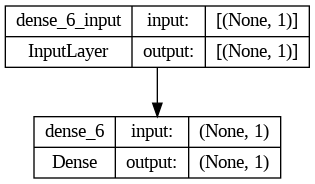

In [ ]:
# It is possible to plot the model
from tensorflow.keras.utils import plot_model

plot_model(model = model,
           show_shapes = True)

In [ ]:
# We can also name models and layers to easily distinguish them
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 50,
                          input_shape = [1],
                          activation = 'relu',
                          name = 'Input_Layer'),
    tf.keras.layers.Dense(units = 1,
                          name = 'Output_Layer')
], name = 'Model1')

model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 50)                100       
                                                                 
 Output_Layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

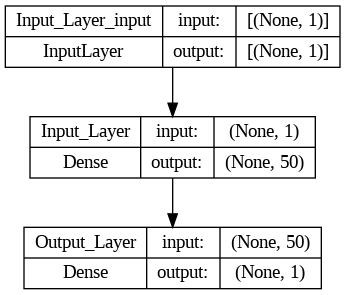

In [ ]:
plot_model(model = model,
           show_shapes = True)

In [ ]:
# Visualizing the predictions
# First we'll get the predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 87ms/step


array([[-81.17067   ],
       [ 77.651566  ],
       [ 28.060123  ],
       [110.71252   ],
       [-53.91657   ],
       [127.24299   ],
       [  6.0194845 ],
       [  0.50932574],
       [ 39.08044   ],
       [-40.289524  ]], dtype=float32)

In [ ]:
# Now we'll define a function that will plot the predictions
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = y_pred):
  plt.figure(figsize = (8,6))
  # Plotting the train data
  plt.scatter(train_data, train_label, c='b', label = "Train Data")
  # Plotting the test data
  plt.scatter(test_data, test_label, c = 'g', label = 'Test Data')
  # Plotting the predictions against the test labels
  plt.scatter(test_label, predictions, c = 'r', label = 'Predictions')
  plt.legend();

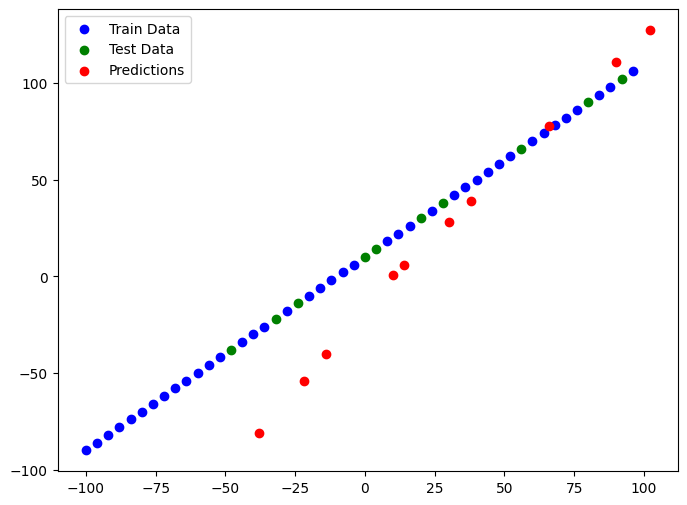

In [ ]:
plot_predictions()

##Evaluating the model with Evaluation Metrics

One of the most common ways to evaluate any model is by using evaluation metrics. Theses metrics quantify how wrong our model is, and help us decide whether we should improve our model or not.

Depending on the type of problem we're trying to solve (either regression or classification), there are different metrics that can be used.

Since we're working with a regression problem, here are some of the most common regreesion metrics:

*   **Mean Absolute Error (MAE)** - The most basic regression metric.
*   **Mean Squared Error (MSE)** - Punishes high error values.
* **Root Mean Squared Error (RMSE)** - The square root of MSE. It is measured in the same units as the variables.
* **Huber** - Calculate the Huber loss. A combination of MAE & MSE.
* **$R^2$ Score** - coefficient of determination. It quantifies the percentage of variance of the dependant variables that is explained by the independant  variables. It is a useful statistic for evaluating the overall effectiveness and explanatory power of a regression model.

In TensorFlow, these metrics can be accessed through `tensorflow.keras.losses`.





In [ ]:
# Evaluating the model on the test set with the metric chosen during compilation (MAE)
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 522ms/step - loss: 17.9475 - mae: 17.9475


[17.947534561157227, 17.947534561157227]

In [ ]:
# Now let's use the regression metrics
# Calculating MAE
# We need to convert the preditions into a tensor from a numpy array
# We also need to squeeze the prediction tensor since it has the shape of (10,1) while y_test has the shape of (10,)
tf.keras.losses.MAE(y_test, tf.constant(y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float32, numpy=17.947535>

In [ ]:
# Calculating MSE
tf.keras.losses.mean_squared_error(y_test, tf.constant(y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float32, numpy=493.41812>

In [ ]:
# Calculating RMSE
import math
math.sqrt(tf.keras.losses.mean_squared_error(y_test, tf.constant(y_pred.squeeze())))

22.213016934623955

In [ ]:
# Putting MAE, MSE, RMSE into a function
def regression_metrics(y_true, y_pred):
  metrics = {}
  y_pred = tf.constant(y_pred.squeeze())
  mae = tf.get_static_value(tf.keras.losses.mean_absolute_error(y_true, y_pred))
  mse = tf.get_static_value(tf.keras.losses.mean_squared_error(y_true, y_pred))
  rmse = math.sqrt(tf.keras.losses.mean_squared_error(y_true, y_pred))

  metrics['MAE'] = mae
  metrics['MSE'] = mse
  metrics['RMSE'] = rmse

  return metrics

In [ ]:
results = regression_metrics(y_test, y_pred)
results

{'MAE': 17.947535, 'MSE': 493.41812, 'RMSE': 22.213016934623955}

#Modeling Experiments

Now that we evaluated our regression model, the next logical step is to try and improve it. This can be done with the steps outlined in **Improveing the Model** section among others.

But improving a single model is not enough. A better paradigm is to run multiple experiments on the data, i.e. build multiple, slighlty different models, fit them and get predictions using said models.

For example: using the X and y data above, we want to model multiple experiments with these models:

1. `model_1` - consisting of a single hidden layer, trained for 100 epochs.
2. `model_2` - consisting of two hidden layers, trained for 100 epochs.
3. `model_3` - consisting of two hidden layers, trained for 500 epochs
4. `model_4` - consisting of three hidden layers, trained for 100 epochs.

In [ ]:
# BUILDING model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1)
])

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae', 'mse'])

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 13.3471 - mae: 13.3471 - mse: 246.5595
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2959 - mae: 10.2959 - mse: 120.2116
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6814 - mae: 12.6814 - mse: 240.0279
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2563 - mae: 9.2563 - mse: 122.0391
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7578 - mae: 10.7578 - mse: 176.4955
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 13.5272 - mae: 13.5272 - mse: 273.8419
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2026 - mae: 12.2026 - mse: 237.4169
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.8648 - mae: 9.8648 - mse: 98.1161
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 14.6603 - mae: 14.6603 - mse: 295.2137
Epoch 10/100


1/1 [==============================] - 0s 77ms/step


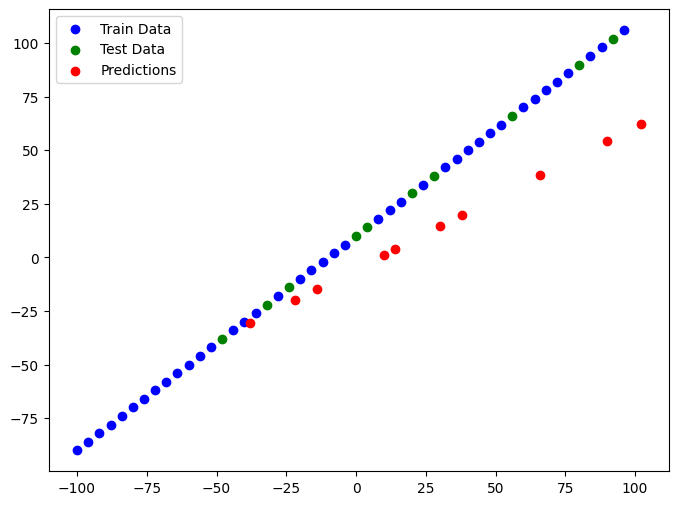

In [ ]:
# Making predictions with model_1 and plotting them
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [ ]:
# Getting evaluation metrics for model_1
model_1_results = regression_metrics(y_test, y_pred_1)
model_1_results

{'MAE': 16.541035, 'MSE': 440.77744, 'RMSE': 20.994700171775122}

In [ ]:
# Adding model_1 results to a dictionary the will contain all the results for the four experiments
experiments = {}
experiments['model_1'] = model_1_results
experiments

{'model_1': {'MAE': 16.541035, 'MSE': 440.77744, 'RMSE': 20.994700171775122}}

In [ ]:
# BUILDING model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 50),
    tf.keras.layers.Dense(units = 1)
])

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae', 'mse'])

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 39.7812 - mae: 39.7812 - mse: 2175.5376
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 23.7285 - mae: 23.7285 - mse: 871.0008
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 32.0508 - mae: 32.0508 - mse: 1344.4359
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 24.2952 - mae: 24.2952 - mse: 779.3193
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 25.4674 - mae: 25.4674 - mse: 947.8391
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2845 - mae: 10.2845 - mse: 119.5557
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 41.4667 - mae: 41.4667 - mse: 2224.2505
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 17.8390 - mae: 17.8390 - mse: 520.2903
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.8780 - mae: 40.8780 - mse: 2283.5479
Epoc

1/1 [==============================] - 0s 50ms/step


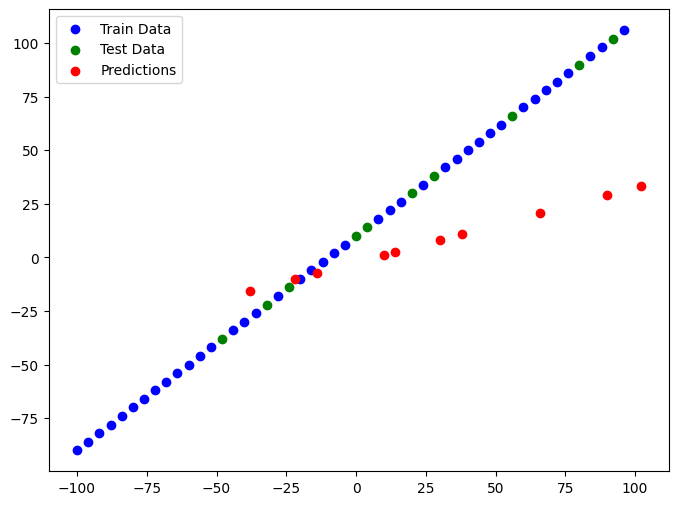

In [ ]:
# Making predictions with model_1 and plotting them
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [ ]:
# Getting evaluation metrics for model_2
model_2_results = regression_metrics(y_test, y_pred_2)
model_2_results

{'MAE': 28.567383, 'MSE': 1263.4565, 'RMSE': 35.54513388593086}

In [ ]:
# Adding model_2 results to a dictionary the will contain all the results for the four experiments
experiments['model_2'] = model_2_results
experiments

{'model_1': {'MAE': 16.541035, 'MSE': 440.77744, 'RMSE': 20.994700171775122},
 'model_2': {'MAE': 28.567383, 'MSE': 1263.4565, 'RMSE': 35.54513388593086}}

In [ ]:
# BUILDING model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 50),
    tf.keras.layers.Dense(units = 1)
])

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae','mse'])

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose = 0)

1/1 [==============================] - 0s 47ms/step


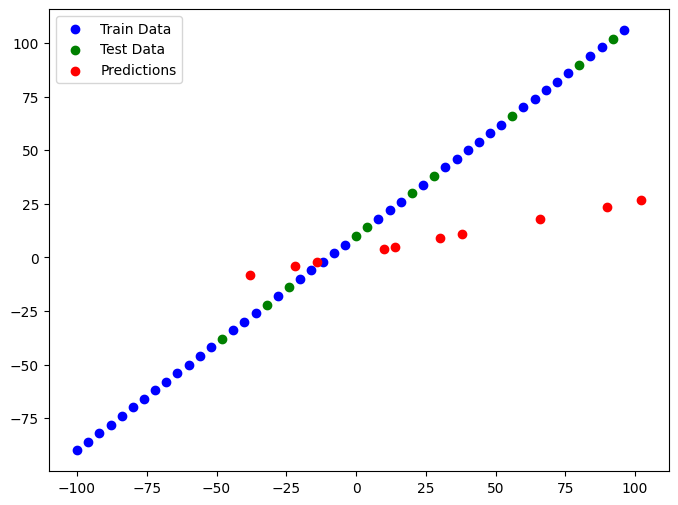

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [ ]:
model_3_results = regression_metrics(y_test, y_pred_3)
model_3_results

{'MAE': 31.321415, 'MSE': 1505.6713, 'RMSE': 38.80298010009589}

In [ ]:
experiments['model_3'] = model_3_results
experiments

{'model_1': {'MAE': 16.541035, 'MSE': 440.77744, 'RMSE': 20.994700171775122},
 'model_2': {'MAE': 28.567383, 'MSE': 1263.4565, 'RMSE': 35.54513388593086},
 'model_3': {'MAE': 31.321415, 'MSE': 1505.6713, 'RMSE': 38.80298010009589}}

In [ ]:
# BUILDING model_4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100),
    tf.keras.layers.Dense(units = 50),
    tf.keras.layers.Dense(units = 1)
])

model_4.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD())

model_4.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

1/1 [==============================] - 0s 51ms/step


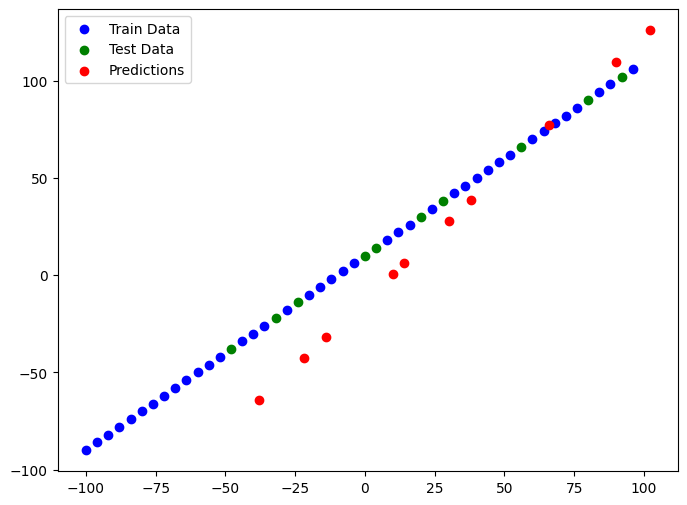

In [ ]:
y_pred_4 = model_4.predict(X_test)
plot_predictions(predictions = y_pred_4)

In [ ]:
model_4_results = regression_metrics(y_test, y_pred_4)
model_4_results

{'MAE': 13.898544, 'MSE': 266.0324, 'RMSE': 16.310499982157776}

In [ ]:
experiments['model_4'] = model_4_results
experiments

{'model_1': {'MAE': 16.541035, 'MSE': 440.77744, 'RMSE': 20.994700171775122},
 'model_2': {'MAE': 28.567383, 'MSE': 1263.4565, 'RMSE': 35.54513388593086},
 'model_3': {'MAE': 31.321415, 'MSE': 1505.6713, 'RMSE': 38.80298010009589},
 'model_4': {'MAE': 13.898544, 'MSE': 266.0324, 'RMSE': 16.310499982157776}}

In [ ]:
# Showing results as a pandas dataframe
import pandas as pd
result_frame = pd.DataFrame(experiments).T
result_frame

,MAE,MSE,RMSE
model_1,16.541035,440.777435,20.994700
model_2,28.567383,1263.456543,35.545134
model_3,31.321415,1505.671265,38.802980
model_4,13.898544,266.032410,16.310500


In [ ]:
# The best model we got is model_4 as evident by MAE and MSE.
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Saving & Loading the Model

Now that we got a well-performing model, it is a good idea to save it so that we can use it outside google colab in other applications.

There are different formats in which we can save a TensorFlow model:

1.   **SavedModel** format - A SavedModel contains a complete TensorFlow program, including trained parameters (i.e, tf.Variables) and computation. This format is not recommended as per the documentation.
2.   **HDF5** format - a basic legacy high-level save format using the HDF5 standard. A model is saved as a .h5 file.
3. **Keras** format - The new Keras v3 saving format, marked by the .keras extension, is a more simple, efficient format that implements name-based saving, ensuring what you load is exactly what you saved, from Python's perspective. This makes debugging much easier, and it is the recommended format for Keras.

The first two are older formats and are not recommended as per the documentation. Hence, we will use the newer Keras format.



In [ ]:
# Saving model_4
model_4.save('best_regress_model.keras')

In [ ]:
# Loading model_4
model_4_loaded = tf.keras.models.load_model('best_regress_model.keras')
model_4_loaded.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Checking if the model still performs well after loading
y_pred = model_4_loaded.predict(X_test)

regression_metrics(y_test, y_pred)

1/1 [==============================] - 0s 62ms/step


{'MAE': 13.898544, 'MSE': 266.0324, 'RMSE': 16.310499982157776}

#TensorFlow Regression on a Real-World Dataset

Now that we've went through all the steps required to build, train, evaluate a tensorflow model on some basic manually generated dataset, it is time to perform what we've learned using a real-world dataset.

More specifically, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) available from Kaggle.

In this dataset, We're going to try predict the cost of medical insurance (`charges`) for individuals based on a number of different parameters such as `age`, `sex`, `bmi` (body mass index), `children`, `smoking_status` and `residential_region`.



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Checking the length of the dataset, we have 1338 entries and 7 columns
len(df)

1338

In [ ]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since we have string data in the dataset, we must one-hot encode it before feeding it into a TensorFlow model.

In [ ]:
# One-hot encoding
# It is important to define the dtype of the encoded features as int rather than boolean
# So that the entire dataframe is numerical, otherwise errors could arise
df_encoded = pd.get_dummies(df, dtype=int)
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Defining the features and the label
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Creating the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
len(X_train), len(X_test)

(1070, 268)

In [ ]:
# Building the model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8579.3076 - mae: 8579.3076
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7766.7251 - mae: 7766.7251
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7617.1270 - mae: 7617.1270
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7774.2109 - mae: 7774.2109
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7646.1143 - mae: 7646.1143
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7660.6875 - mae: 7660.6875
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7574.5801 - mae: 7574.5801
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7759.5693 - mae: 7759.5693
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7525.5146 - mae: 7525.5146
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7664.0103 - mae: 7664.0103

In [ ]:
# Evaluating on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7409.4414 - mae: 7409.4414


[7409.44140625, 7409.44140625]

In [ ]:
# The mean value for charges in the train data is +13k
y_train.mean()

13346.089736364485

It's clear that the model is not performing well. Evaluating on the test data, it seems that model will be off by almost 7000 from the actual values! Which is quite high, especially taken into account that the mean value for charges is 13000. Hence, we need to improve the model.

In [ ]:
# Building a second larger model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100), # New hidden layer with 100 neurons
    tf.keras.layers.Dense(units = 10),
    tf.keras.layers.Dense(units = 1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam()) # We will be using the Adam() optimizer

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13319.7715
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13202.3672
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 12950.2266
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12429.8369
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11488.7939
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 10111.3789
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8638.9180
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7682.3599
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7448.7793
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7422.0825
Epoch 11/100
34/34 [==============================] - 0s 3ms/step - loss: 7403.4067
Epoch 12/100
34/34 [==============================] - 0s 3ms/step - loss: 7382.

In [ ]:
# Evaluating the model on the test data
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5053.2598


5053.259765625

We can see an immediate improvement in the model.

**Note:** using SGD with the larger model didn't yield any results whatsoever, as the loss was displayed as NaN. This can be due to many different reasons, for example the model is not learning anything with this optimizer, or the learning rate being too high, etc.

To solve this, we used Adam optimizer with the default learning rate.

In [ ]:
# # Building a third model that is similar to the second but will be trained for 200 epochs
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100), # New hidden layer with 100 neurons
    tf.keras.layers.Dense(units = 10),
    tf.keras.layers.Dense(units = 1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam()) # We will be using the Adam() optimizer

# We introduce the history variable that will be used going forward
# It will be used to plot loss curves
history = model_3.fit(X_train, y_train, epochs = 200, verbose = 0)

In [ ]:
model_3.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3671.3665


3671.366455078125

An even further decrease in the test loss, which is great!

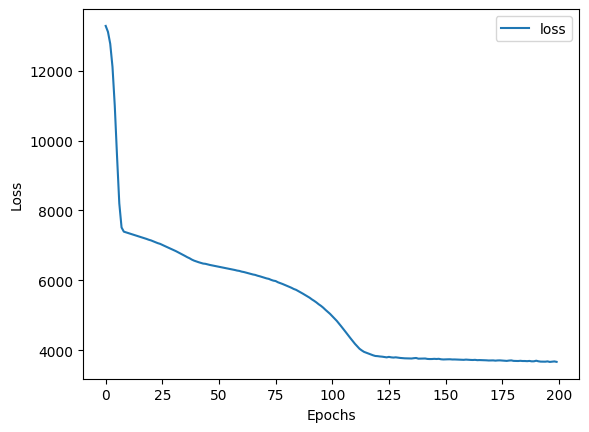

In [ ]:
# Plotting the loss curve using the history variable
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs');

Using the elbow method we can see that the loss function starts to decrease very slowly at around 115 epochs, which means that training for 200 epochs was not needed, and training for more than 115 epochs does not yield any improvements.

There are other way to control how many epochs the model trains for, like Early Stopping among others, which we will cover later.

#Data Normalization and Standardisation

An important part of data preparation and feature engineering in ML and DL is **data scaling**. Scaling ensures that features have values in the same range, and improves the performance and training stability of the model by mitigating the influence of varying scales on ML and DL models. Two of the most prevelant scaling techniques are normalization and standardisation.

**Normalization** (also called  Min-Max scaling) is a feature scaling technique often applied as part of data preparation for machine and deep learning. The goal of normalization is to change the values of numeric columns in a dataset to a similar scale without distorting differences in the ranges of values.

Typically, normalization converts all the numerical values to be between 0 and 1, while preserving the original distribution of data. Normalization is what typically used with deep learning, and is useful when the distribution of the data is unknown or not Gaussian

$X' = (X - Xmin) / (Xmax - Xmin)$, where:
*   $X'$ = Value of Normalization
*   $Xmin$ = Minimum value of a feature
* $Xmax$ =  Maximum value of a feature

In Scikit-Learn normalization can be applied with `MinMaxScaler`

---------------
**Standardisation** (also known as Z-score normalization) is another feature scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.

Standardisation is less sensetive to outliers, but it changes the distribution of the data. It Centers data around the mean and scales to a standard deviation of 1. And as with the case of normalization (and scaling in general) help machine learning and deep learning models to converge faster.

It is useful when the distribution of the data is Gaussian or unknown

$X' = (X - μ) / σ$, where:
*   $μ$ is the mean of the feature values and Feature scaling.
*   $σ$ is the standard deviation of the feature values.

In Scikit-Learn standardisation can be applied with `StandardScaler`

Each of them has its use-cases. More info [here](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=0%20and%201-,What%20is%20Standardization%3F,has%20a%20unit%20standard%20deviation.)








In [ ]:
# We'll redo everything from the previous section but additionally normalize the numerical data
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# We need to one-hot encode the string data AND normalize the numerical data
# Hence we'll compose a transformer that will perform both of these operations
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Creating the transformer pipline
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'region', 'smoker'])
)

# Creating X and y
X = df.drop('charges', axis = 1)
y = df['charges']

# Creating the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fitting the transformer to the X_train data
ct.fit(X_train)

# Transforming the train data with the transformer we created above
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Now we have our data normalized and one-hot encoded
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        ])

In [ ]:
# Now that we have the data ready, let's build a model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam())

history = model.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13344.5781
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13337.4473
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13318.7402
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13277.9248
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13203.5605
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13084.6455
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12910.8242
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12671.9102
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12357.6553
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11962.7549
Epoch 11/100
34/34 [==============================] - 0s 5ms/step - loss: 11494.6846
Epoch 12/100
34/34 [==============================] - 0s 5ms/step - loss: 

In [ ]:
# Evaluating on the test data
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3439.7761


3439.776123046875

Great! The loss was reduced from around 5000 to around 3400 which is about 32%.

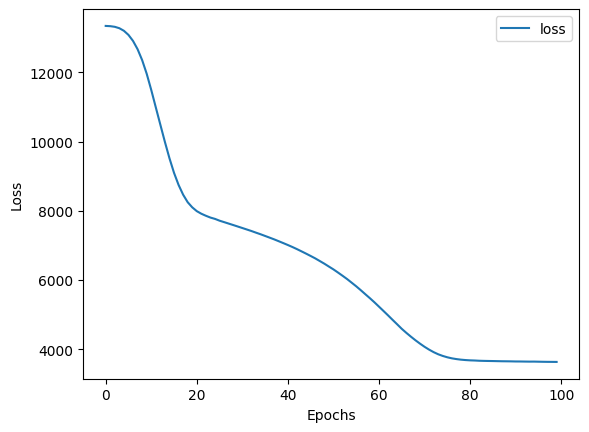

In [ ]:
# Plotting the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss');